# Programming and Mathematics for AI Coursework: Task 1

Éamonn Ó Cearnaigh - 180001598

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Selecting between game mode A and game mode B

In [2]:
def game_mode_selection():
    
    print("=-=-= GAME MODE SELECTION =-=-=\n")
    print("A - The time spent on a cell is the number on this cell.\n")
    print("B - The time spent on a cell is the absolute of the difference between the previous cell the agent was on and the current cell it is on.")
    
    selected = False
    while selected == False:
        
        game_mode = input("Select game mode (A/B): ").upper()
        
        if game_mode != "A" and game_mode != "B":
            print("\nInvalid option.  Game mode can be 'A' or 'B'.\n")
            
        else:
            print("Game mode selected.\n")
            selected = True
    
    return game_mode

Selecting parameters for grid height, width, and n - the maximum integer for a cell   

In [3]:
def parameter_selection():
    
    #print("=-=-= PARAMETER SELECTION =-=-=\n")
    
    # For user input
    height = int(input("Grid height: "))
    width = int(input("Grid width: "))
    n = int(input("Max cell integer: "))
    
    # For testing and demonstration
    #height = 15
    #width = 29
    #n = 9
    
    game_parameters = height, width, n
    
    return game_parameters

In [4]:
def build_grid(game_parameters):
    
    #print("=-=-= BUILDING GRID =-=-=\n")
    
    height = game_parameters[0]
    width = game_parameters[1]
    n = game_parameters[2]
    
    # Creating matrix
    np.random.seed(0)
    matrix = np.random.randint(0, n, size=(height, width))
    #print(matrix, "\n")
    
    # Agent spawns in upper-left corner cell
    agent_position = [0,0]
    agent_position_value = matrix[0][0]
    
    #print("Agent position: {}\n".format(agent_position))
    #print("Agent position value: {}\n".format(agent_position_value))
    
    # Destination is the bottom-right corner cell
    destination_position = [width-1, height-1]
    destination_position_value = matrix[height-1][width-1]
    
    #print("Destination position: {}\n".format(destination_position))
    #print("Destination position value: {}\n".format(destination_position_value))
    
            
    # Visualising matrix and path
    current_cmap = plt.cm.Purples
    current_cmap.set_bad(color='green')
    fig, ax = plt.subplots()
    ax.matshow(matrix,cmap=plt.cm.Purples)
    ax.axis('off')
    
    # Cell values
    for i in range(width):
        for j in range(height):
          c = matrix[j,i]
          ax.text(i, j, str(c), va='center', ha='center')
    
    
    return matrix, agent_position, agent_position_value, destination_position, destination_position_value
    

Baseline path algorithm that moves agent from top left to bottom right of the grid.  It compares the cell values to the right and below the agent's current cell.  Whichever is lower, it will move to.  When it encounters the grid edge (either bottom of the grid or the rightmost column) it will continue to slide along the edge to the destination cell.

In [5]:
def baseline_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position, destination_position_value):
    
    #print("=-=-= BASELINE PATH =-=-=\n")
    
    #print("Agent position: {}\n".format(agent_position))
    #print("Agent position value: {}\n".format(agent_position_value))
    
    height = game_parameters[0]
    width = game_parameters[1]
    
    # Variable to control loop
    destination_reached = False
    
    # Accumulation of visited cell values 
    total_cost = 0
    
    # Tracking which cells have been visited in matrix
    visited_cells = np.zeros((height, width), dtype=bool)
    
    while not destination_reached:
        
        # If agent position matches destination position, end loop
        if agent_position == destination_position:
            #print("Agent has reached destination\n")
            #print("=-=-=-=-=-=-=-=-=-=\n")
            #print("Total time (cost) reaching destination: {}\n".format(total_cost))
            destination_reached = True
            
            visited_cells[agent_position[1], agent_position[0]] = True
            
            continue
        
        # Moving diagonally towards destination
        # Comparing adjacent cells to choose whether to move right or down
        
        # Checking agent is not on right or bottom edge to avoid index error
        if agent_position[0] != destination_position[0] and agent_position[1] != destination_position[1]:
            
            # Checking cell to the right of agent against the cell below agent
            cell_right_position = [agent_position[0]+1, agent_position[1]]
            cell_right_position_value = matrix[agent_position[1]][agent_position[0]+1]
            #print("Right position: {}\n".format(cell_right_position))
            #print("Right position value: {}\n".format(cell_right_position_value))
            
            cell_down_position = [agent_position[0], agent_position[1]+1]
            cell_down_position_value = matrix[agent_position[1]+1][agent_position[0]]
            #print("Down position: {}\n".format(cell_down_position))
            #print("Down position value: {}\n".format(cell_down_position_value))
            
            
        else:
            # Agent is on edge
            
            # If agent at right edge, move down
            if agent_position[0] == destination_position[0]:
                #print("Agent has hit right edge, moving down\n")
                #print("=-=-=-=-=-=-=-=-=-=\n")
                
                # Cost
                if game_mode == "A":
                    total_cost = total_cost + agent_position_value
                elif game_mode == "B":
                    total_cost = total_cost + abs(agent_position_value - cell_down_position_value)
                #print("Total cost: {}\n".format(total_cost))
                
                cell_down_position = [agent_position[0], agent_position[1]+1]
                cell_down_position_value = matrix[agent_position[1]+1][agent_position[0]]
                #print("Down position: {}\n".format(cell_down_position))
                #print("Down position value: {}\n".format(cell_down_position_value))
                
                agent_position = cell_down_position
                agent_position_value = cell_down_position_value
                
                #print("Agent position: {}\n".format(agent_position))
                #print("Agent position value: {}\n".format(agent_position_value))
                
                visited_cells[agent_position[1], agent_position[0]] = True
                
                continue
            
            # If agent at bottom edge, move right
            elif agent_position[1] == destination_position[1]:
                #print("Agent has hit bottom edge, moving right\n")
                #print("=-=-=-=-=-=-=-=-=-=\n")
                
                # Cost
                if game_mode == "A":
                    total_cost = total_cost + agent_position_value
                elif game_mode == "B":
                    total_cost = total_cost + abs(agent_position_value - cell_down_position_value)
                #print("Total cost: {}\n".format(total_cost))
                
                cell_right_position = [agent_position[0]+1, agent_position[1]]
                cell_right_position_value = matrix[agent_position[1]][agent_position[0]+1]
                #print("Right position: {}\n".format(cell_right_position))
                #print("Right position value: {}\n".format(cell_right_position_value))
                
                agent_position = cell_right_position
                agent_position_value = cell_right_position_value
                
                #print("Agent position: {}\n".format(agent_position))
                #print("Agent position value: {}\n".format(agent_position_value))
                
                visited_cells[agent_position[1], agent_position[0]] = True
                
                continue
            
        # If right cell value < below cell value, move right
        if cell_right_position_value < cell_down_position_value:
            #print("Agent moving right\n")
            #print("=-=-=-=-=-=-=-=-=-=\n")
            
            # Cost
            if game_mode == "A":
                total_cost = total_cost + agent_position_value
            elif game_mode == "B":
                total_cost = total_cost + abs(agent_position_value - cell_down_position_value)
            #print("Total cost: {}\n".format(total_cost))
            
            agent_position = cell_right_position
            agent_position_value = cell_right_position_value
            
            #print("Agent position: {}\n".format(agent_position))
            #print("Agent position value: {}\n".format(agent_position_value))
            
            visited_cells[agent_position[1], agent_position[0]] = True
        
        # If right cell value >= below cell value, move down
        elif cell_right_position_value >= cell_down_position_value:
            #print("Agent moving down\n")
            #print("=-=-=-=-=-=-=-=-=-=\n")
            
            # Cost
            if game_mode == "A":
                total_cost = total_cost + agent_position_value
            elif game_mode == "B":
                total_cost = total_cost + abs(agent_position_value - cell_down_position_value)
            #print("Total cost: {}\n".format(total_cost))
            
            agent_position = cell_down_position
            agent_position_value = cell_down_position_value
            
            #print("Agent position: {}\n".format(agent_position))
            #print("Agent position value: {}\n".format(agent_position_value))
            
            visited_cells[agent_position[1], agent_position[0]] = True
            
    
    # Visualising matrix and path
    temp_matrix = matrix.astype(float)
    fig, ax = plt.subplots()
    
    # Cell values
    for i in range(width):
        for j in range(height):
          c = matrix[j,i]
          ax.text(i, j, str(c), va='center', ha='center')
          
          # Path
          temp_matrix[0,0] = np.nan
          if visited_cells[j,i] == True:
              temp_matrix[j,i] = np.nan
          
    ax.axis('off')
    ax.matshow(temp_matrix, cmap = plt.cm.Purples)
    
    return total_cost

Adaption of Dijkstra's algorithm

In [6]:
def dijkstra_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position):
    
    #print("=-=-= DIJKSTRA PATH =-=-=\n")
    
    # Matrix height, width
    height = game_parameters[0]
    width = game_parameters[1]
    
    # Tracking time cost for each cell in matrix
    time_matrix = np.ones((height, width), dtype=int) * np.Infinity
    
    # Agent starting position
    time_matrix[0,0] = 0
    
    # Accumulation of visited cell values 
    total_cost = 0
    
    # Tracking path through matrix
    path_matrix = np.ones((height, width), dtype=int) * np.nan
    
    # Tracking which cells have been visited in matrix
    visited_cells = np.zeros((height, width), dtype=bool)
    
    # Variables to simplify agent position
    x, y = agent_position[0], agent_position[1]
    
    # Variable to control loop
    destination_reached = False
    
    # Main loop
    while not destination_reached:
        
        # move UP
      if y < width - 1:
        if time_matrix[x, y + 1] > matrix[x, y + 1] + time_matrix[x, y] and not visited_cells[x, y + 1]:
            
            if game_mode == "A":
                time_matrix[x, y + 1] = time_matrix[x, y] + matrix[x, y + 1]
            
            elif game_mode == "B":
                time_matrix[x, y + 1] = time_matrix[x, y] + abs(matrix[x, y + 1] - matrix[x, y])
            
            path_matrix[x, y + 1] = np.ravel_multi_index([x, y], (height, width))
          
      # move DOWN
      if y > 0:
        if time_matrix[x, y - 1] > matrix[x, y - 1] + time_matrix[x, y] and not visited_cells[x, y - 1]:

          if game_mode == "A":
              time_matrix[x, y - 1] = matrix[x, y - 1] + time_matrix[x, y]
            
          elif game_mode == "B":
                time_matrix[x, y - 1] = time_matrix[x, y] + abs(matrix[x, y - 1] - matrix[x, y])
          
          path_matrix[x, y - 1] = np.ravel_multi_index([x, y], (height, width))
        
      # move RIGHT
      if x < height - 1:
        if time_matrix[x + 1, y] > matrix[x + 1, y] + time_matrix[x, y] and not visited_cells[x + 1, y]:
          
          if game_mode == "A":
              time_matrix[x + 1, y] = matrix[x + 1, y] + time_matrix[x, y]
                
          elif game_mode == "B":
              time_matrix[x + 1, y] = time_matrix[x, y] + abs(matrix[x + 1, y] - matrix[x, y])
          
          path_matrix[x + 1, y] = np.ravel_multi_index([x, y], (height, width))
          
      # move LEFT
      if x > 0:
        if time_matrix[x - 1, y] > matrix[x - 1, y] + time_matrix[x, y] and not visited_cells[x - 1, y]:
          
          if game_mode == "A":
              time_matrix[x - 1, y] = matrix[x - 1, y] + time_matrix[x, y]
              
          elif game_mode == "B":
              time_matrix[x - 1, y] = time_matrix[x, y] + abs(matrix[x - 1, y] - matrix[x, y])
              
          
          path_matrix[x - 1, y] = np.ravel_multi_index([x, y], (height, width))
          
        # Mark cell visited
      visited_cells[x, y] = True
      
      temp_time_matrix = time_matrix
      temp_time_matrix[np.where(visited_cells)] = np.Infinity
      
      # Determining shortest path
      minpost = np.unravel_index(np.argmin(temp_time_matrix), np.shape(temp_time_matrix))
      x, y = minpost[0], minpost[1]
      if x == height - 1 and y == width - 1:
        destination_reached = True
    
    # End of main Dijkstra loop
    
    # Backtracking along path for visualisation
    temp_matrix = matrix.astype(float)
    x, y = height - 1, width - 1
    path_travelled = []
    temp_matrix[int(x), int(y)] = np.nan
    
    while y > 0.0 or x > 0.0:
        # Using path matrix
      path_travelled.append([int(x), int(y)])
      xxyy = np.unravel_index(int(path_matrix[int(x), int(y)]), (height, width))
      x, y = xxyy[0], xxyy[1]
      temp_matrix[int(x), int(y)] = np.nan
    path_travelled.append([int(x), int(y)])
    
    # Visualising matrix and path
    
    fig, ax = plt.subplots()
    
    # Cell values
    for i in range(width):
        for j in range(height):
          c = matrix[j,i]
          ax.text(i, j, str(c), va='center', ha='center')
    ax.axis('off')
    ax.matshow(temp_matrix, cmap = plt.cm.Purples)
    
    # Final time cost
    total_cost = time_matrix[height - 1, width - 1] + matrix[0, 0]
    
    #print("Total time (cost) reaching destination: {}\n".format(total_cost))
    #print("=-=-=-=-=-=-=-=-=-=\n")
    
    return total_cost

=-=-= BEGIN =-=-=

=-=-= GAME MODE SELECTION =-=-=

A - The time spent on a cell is the number on this cell.

B - The time spent on a cell is the absolute of the difference between the previous cell the agent was on and the current cell it is on.
Select game mode (A/B): A
Game mode selected.

Grid height: 15
Grid width: 29
Max cell integer: 9


<ipython-input-4-2c05e1c2dce9>:31: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Purples"))
  current_cmap.set_bad(color='green')


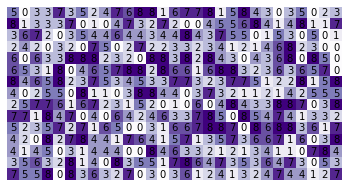

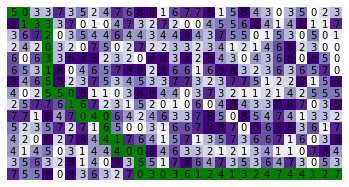

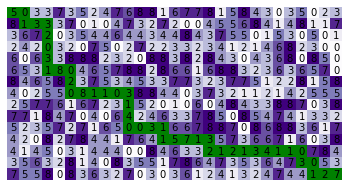

In [7]:
print("=-=-= BEGIN =-=-=\n")

# Using defined functions

game_mode = game_mode_selection()
game_parameters = parameter_selection()
matrix, agent_position, agent_position_value, destination_position, destination_position_value = build_grid(game_parameters)
baseline_cost = baseline_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position, destination_position_value)
dijkstra_cost = dijkstra_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position)

    

# Analysis using set parameters

In [8]:
def analysis(baseline_cost, dijkstra_cost, game_parameters):
    
    # Using set parameters at intervals of 5 height and width
    
    # Vary width, height, n, game mode, number generator distribution
    print("=-=-= ANALYSIS =-=-=\n")
    
    # Parameters - inital
    height = 5
    width = 5
    n = 5
    
    # Initialising lists to store costs and parameter values (grid size and n)
    total_A_baseline_list = []
    total_A_dijkstra_list = []
    total_B_baseline_list = []
    total_B_dijkstra_list = []
    grid_size_list = []
    
    # Loop through different parameter values: Run path finding algorithms for both game modes for each configuration.
    for i in range(10):
        
        print("Height: {} | Width: {} | n = {}\n".format(height, width, n))
    
        game_mode = "A"
        game_parameters = [height, width, n]
        matrix, agent_position, agent_position_value, destination_position, destination_position_value = build_grid(game_parameters)
        A_baseline_cost = baseline_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position, destination_position_value)
        A_dijkstra_cost = dijkstra_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position)
        
        game_mode = "B"
        game_parameters = [height, width, n]
        matrix, agent_position, agent_position_value, destination_position, destination_position_value = build_grid(game_parameters)
        B_baseline_cost = baseline_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position, destination_position_value)
        B_dijkstra_cost = dijkstra_path(game_mode, game_parameters, matrix, agent_position, agent_position_value, destination_position)
        
        print("[Game Mode A] Baseline: {} | Dijkstra: {}\n".format(A_baseline_cost, A_dijkstra_cost))
        print("[Game Mode B] Baseline: {} | Dijkstra: {}\n".format(B_baseline_cost, B_dijkstra_cost))
        
        print("=-=-=-=-=-=-=-=-=-=\n")
        
        # Record total costs and grid size (X * X)
        
        total_A_baseline_list.append(A_baseline_cost)
        total_A_dijkstra_list.append(A_dijkstra_cost)
        
        total_B_baseline_list.append(B_baseline_cost)
        total_B_dijkstra_list.append(B_dijkstra_cost)
        
        grid_size_list.append(height)
        
        height = height + 5
        width = width + 5
        n = n + 5
        
    # Plot costs against grid size & n
    plt.figure()
    plt.plot(grid_size_list, total_A_baseline_list) # Plot baseline costs for mode A
    plt.plot(grid_size_list, total_B_baseline_list) # Plot baseline costs for mode B
    plt.plot(grid_size_list, total_A_dijkstra_list) # Plot dijkstra costs for mode A
    plt.plot(grid_size_list, total_B_dijkstra_list) # Plot dijkstra costs for mode B
    plt.legend(['Baseline A', 'Baseline B', 'Dijkstra A', 'Dijkstra B'])
    plt.title("Analysis: Time cost against grid size and n", loc='center')
    plt.xlabel("Height, width, n")
    plt.ylabel("Time cost")
    plt.show()
    
    # Mean
    print("[Game Mode A] Baseline cost mean : {} | Dijkstra cost mean : {}\n".format(np.mean(total_A_baseline_list), np.mean(total_A_dijkstra_list)))
    print("[Game Mode B] Baseline cost mean : {} | Dijkstra cost mean : {}\n".format(np.mean(total_B_baseline_list), np.mean(total_B_dijkstra_list)))
    
    # Standard Deviation
    print("[Game Mode A] Baseline cost std. dev. : {} | Dijkstra cost std. dev. : {}\n".format(np.std(total_A_baseline_list), np.std(total_A_dijkstra_list)))
    print("[Game Mode B] Baseline cost std. dev. : {} | Dijkstra cost std. dev. : {}\n".format(np.std(total_B_baseline_list), np.std(total_B_dijkstra_list)))
    

=-=-= ANALYSIS =-=-=

Height: 5 | Width: 5 | n = 5



<ipython-input-4-2c05e1c2dce9>:31: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Purples"))
  current_cmap.set_bad(color='green')


[Game Mode A] Baseline: 12 | Dijkstra: 10.0

[Game Mode B] Baseline: 13 | Dijkstra: 14.0

=-=-=-=-=-=-=-=-=-=

Height: 10 | Width: 10 | n = 10

[Game Mode A] Baseline: 56 | Dijkstra: 52.0

[Game Mode B] Baseline: 53 | Dijkstra: 32.0

=-=-=-=-=-=-=-=-=-=

Height: 15 | Width: 15 | n = 15

[Game Mode A] Baseline: 128 | Dijkstra: 95.0

[Game Mode B] Baseline: 107 | Dijkstra: 102.0

=-=-=-=-=-=-=-=-=-=

Height: 20 | Width: 20 | n = 20



<ipython-input-6-1792eda726ef>:112: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


[Game Mode A] Baseline: 238 | Dijkstra: 186.0

[Game Mode B] Baseline: 277 | Dijkstra: 109.0

=-=-=-=-=-=-=-=-=-=

Height: 25 | Width: 25 | n = 25

[Game Mode A] Baseline: 375 | Dijkstra: 334.0

[Game Mode B] Baseline: 422 | Dijkstra: 194.0

=-=-=-=-=-=-=-=-=-=

Height: 30 | Width: 30 | n = 30

[Game Mode A] Baseline: 572 | Dijkstra: 461.0

[Game Mode B] Baseline: 475 | Dijkstra: 303.0

=-=-=-=-=-=-=-=-=-=

Height: 35 | Width: 35 | n = 35

[Game Mode A] Baseline: 763 | Dijkstra: 607.0

[Game Mode B] Baseline: 715 | Dijkstra: 343.0

=-=-=-=-=-=-=-=-=-=

Height: 40 | Width: 40 | n = 40

[Game Mode A] Baseline: 1007 | Dijkstra: 834.0

[Game Mode B] Baseline: 988 | Dijkstra: 535.0

=-=-=-=-=-=-=-=-=-=

Height: 45 | Width: 45 | n = 45

[Game Mode A] Baseline: 1443 | Dijkstra: 1132.0

[Game Mode B] Baseline: 1111 | Dijkstra: 667.0

=-=-=-=-=-=-=-=-=-=

Height: 50 | Width: 50 | n = 50

[Game Mode A] Baseline: 1950 | Dijkstra: 1342.0

[Game Mode B] Baseline: 1485 | Dijkstra: 824.0

=-=-=-=-=-=

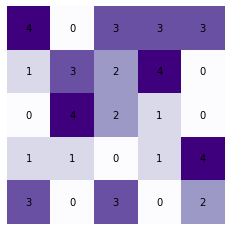

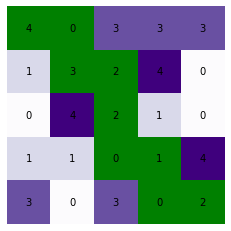

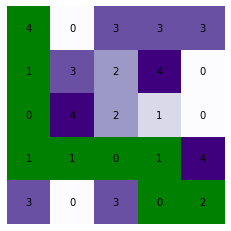

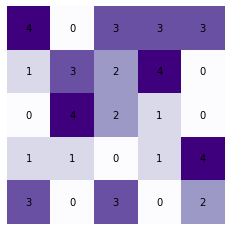

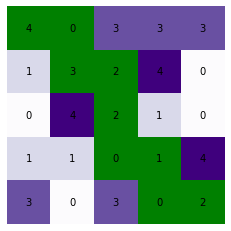

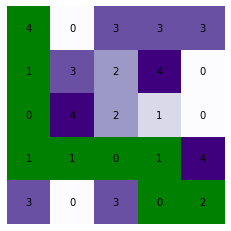

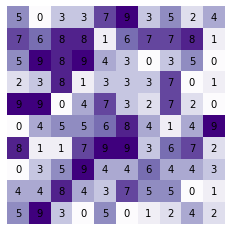

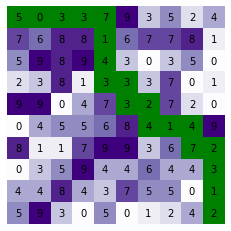

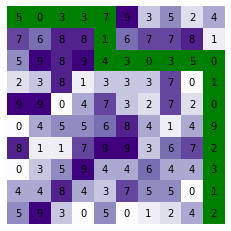

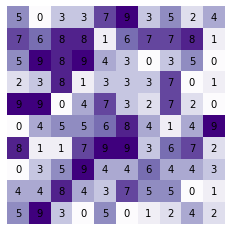

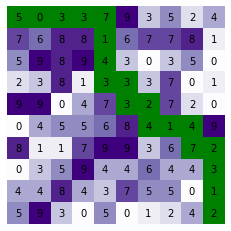

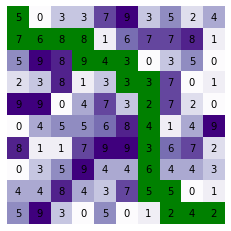

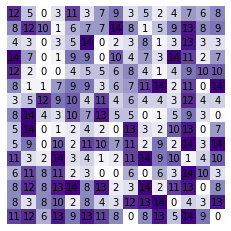

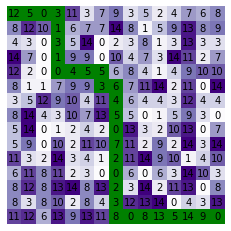

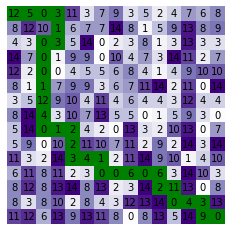

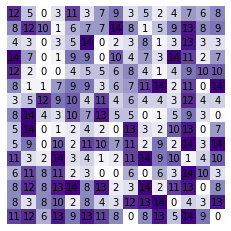

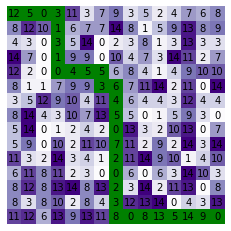

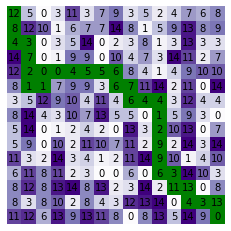

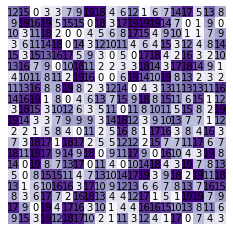

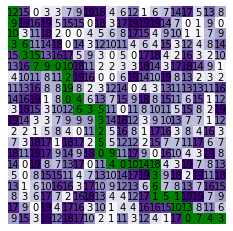

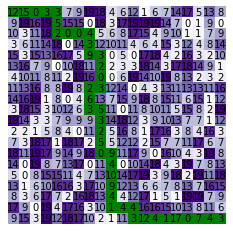

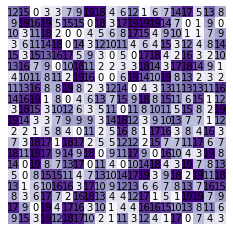

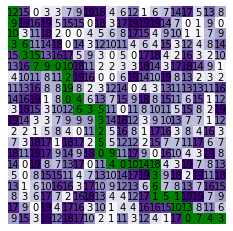

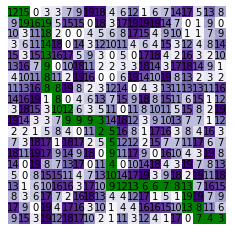

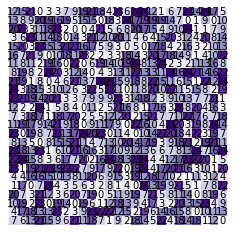

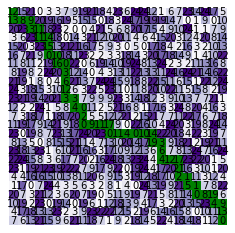

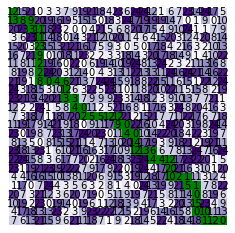

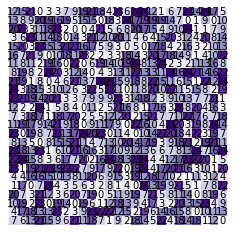

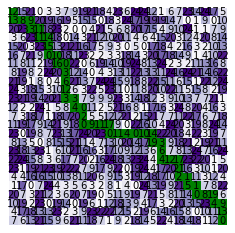

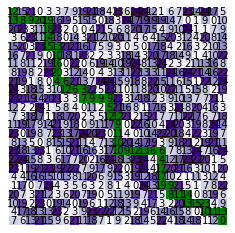

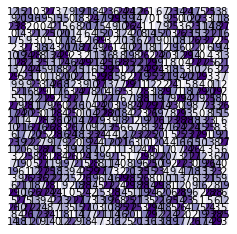

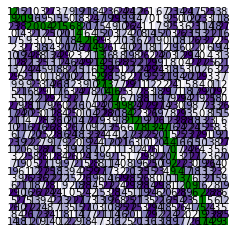

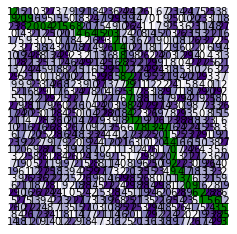

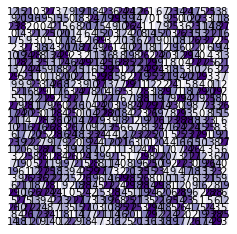

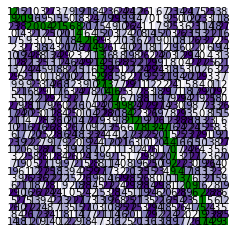

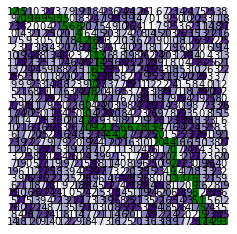

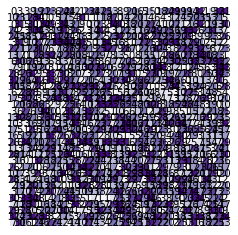

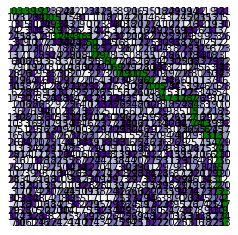

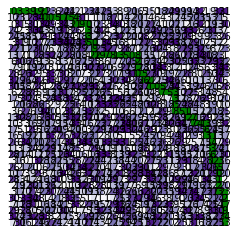

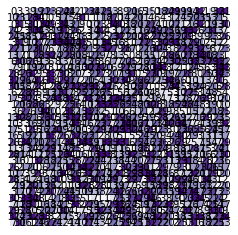

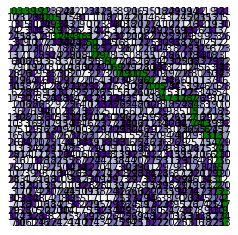

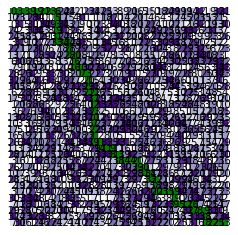

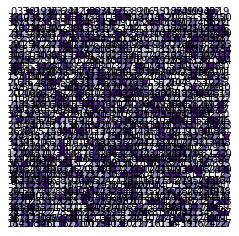

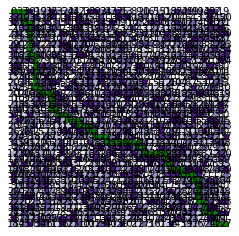

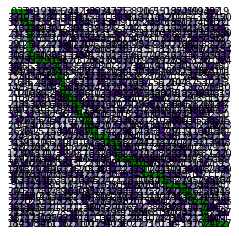

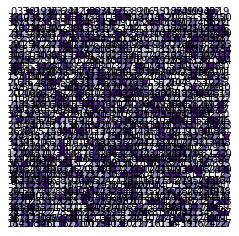

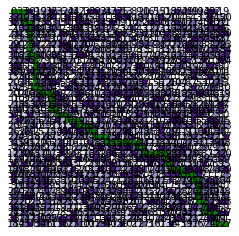

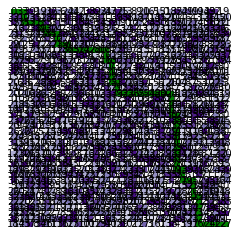

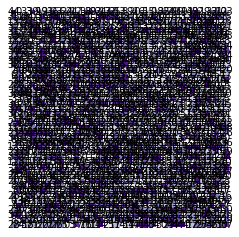

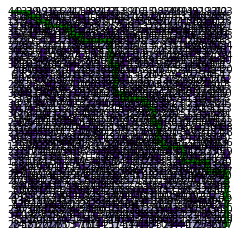

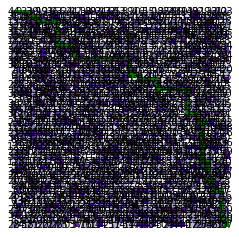

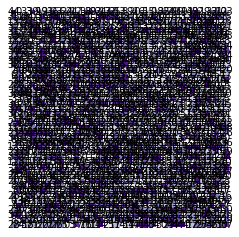

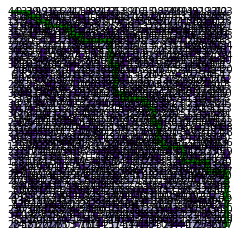

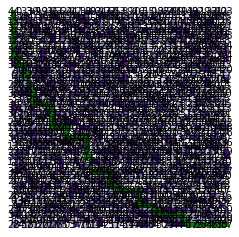

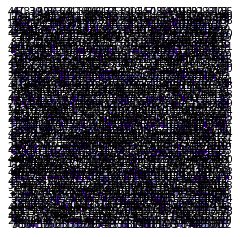

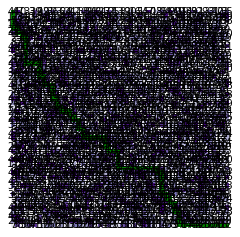

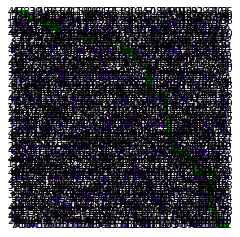

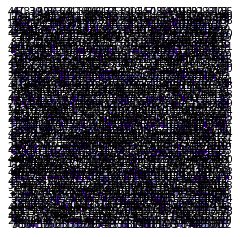

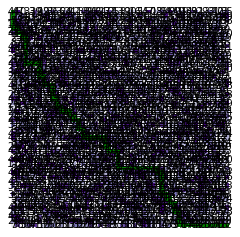

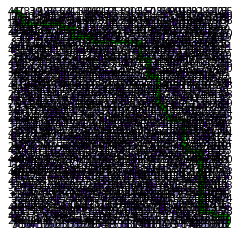

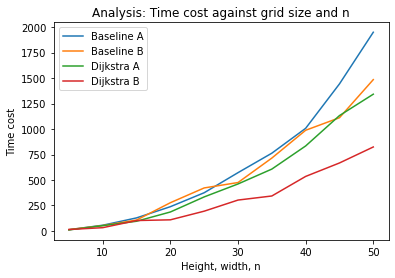

[Game Mode A] Baseline cost mean : 654.4 | Dijkstra cost mean : 505.3

[Game Mode B] Baseline cost mean : 564.6 | Dijkstra cost mean : 312.3

[Game Mode A] Baseline cost std. dev. : 611.775318233745 | Dijkstra cost std. dev. : 443.1268554262989

[Game Mode B] Baseline cost std. dev. : 472.6572119411699 | Dijkstra cost std. dev. : 265.5891752312206



In [9]:
analysis(baseline_cost, dijkstra_cost, game_parameters)